In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv

In [42]:
# Load data from tsv file:

data = pd.read_csv(r'amazon_reviews_us_Shoes_v1_00.tsv',sep='\t', error_bad_lines=False)

C:\Users\mohamad.kurnadi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 54101: expected 15 fields, saw 22\nSkipping line 55857: expected 15 fields, saw 22\nSkipping line 60448: expected 15 fields, saw 22\n'
b'Skipping line 76918: expected 15 fields, saw 22\nSkipping line 87925: expected 15 fields, saw 22\nSkipping line 88500: expected 15 fields, saw 22\nSkipping line 114276: expected 15 fields, saw 22\nSkipping line 128751: expected 15 fields, saw 22\n'
b'Skipping line 136095: expected 15 fields, saw 22\nSkipping line 140007: expected 15 fields, saw 22\nSkipping line 177148: expected 15 fields, saw 22\nSkipping line 180087: expected 15 fields, saw 22\nSkipping line 183010: expected 15 fields, saw 22\nSkipping line 183949: expected 15 fields, saw 22\nSkipping line 192879: expected 15 fields, saw

In [43]:
# Check data head:
data.head(10)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,18069663,R3P2HIOQCIN5ZU,B000XB31C0,265024781,Minnetonka Men's Double Deerskin Softsole Mocc...,Shoes,1,0,0,N,Y,.,Do not buy: really didn't start to wear them u...,2015-08-31
1,US,16251825,R12VVR0WH5Q24V,B00CFYZH5W,259035853,Teva Men's Pajaro Flip-Flop,Shoes,5,0,0,N,Y,super flip flop,provides great cushion as well as archsupport,2015-08-31
2,US,20381037,RNCCKB6TV5EEF,B00S8JNN3Q,666066660,Anne Klein Perfect Pair Wristlet,Shoes,4,0,0,N,Y,Great clutch purse!,It's perfect if you need something small for c...,2015-08-31
3,US,108364,R2NZXYIVCGB13W,B00XFBPOQG,448483263,adidas Men's 10K Lifestyle Runner Sneaker,Shoes,5,0,6,N,Y,Badass,Getting what u see,2015-08-31
4,US,45449350,R2EQ1TG9IT3OEQ,B00SW64Y9W,7853171,OverBling Sneakers for Men Casual Men Shoes Ge...,Shoes,3,0,0,N,Y,Three Stars,small,2015-08-31
5,US,19324665,R1WXA9JSC2H1U1,B011F9E6LI,14311457,MESSI 15.3 FG/AG SOCCER SHOES (8.5),Shoes,5,1,1,N,Y,Five Stars,My 13 year old son loved these shoes excellent...,2015-08-31
6,US,50073594,R12ENYLFGGNWRV,B00HAUP1OI,264821602,Hoka One One Men's Stinson Lite Shoe,Shoes,5,1,1,N,Y,"Finally, some cushion to write about","Ok, I have been searching for shoes to replace...",2015-08-31
7,US,21706057,R2R07E5PNXEUO5,B00L1RKOKW,767118055,Olukai Nohea Mesh Shoe - Men's,Shoes,4,0,0,N,Y,"good deal, but had to go a FULL size down",I went a full size down and they fit better bu...,2015-08-31
8,US,13708216,R27BA52AKWMWN3,B005WA9MSE,813856438,"Carolina Mens 6"" Waterproof Broad Composite To...",Shoes,5,0,0,N,Y,... would have to say this is boot is very goo...,I would have to say this is boot is very good ...,2015-08-31
9,US,40542649,RLF8DOID2KD5O,B00BEYQI5C,661491213,Alegria Women's Seville Clog,Shoes,3,0,0,N,Y,Too small,The size is misleading!,2015-08-31


In [44]:
# Check data tail:

data.tail(10)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
4358810,US,36163484,R39ORJC13QRYEF,B000066TD0,832333657,Women's Evette Mid-Shaft Boots,Shoes,1,0,0,N,N,What a waste,"I purchased this shoe because it looked good, ...",2002-10-30
4358811,US,38079272,R20V5DDXLTC7J1,B000066TCQ,552886106,Women's Bree Suede Moc Snow Joggers,Shoes,5,1,1,N,N,You want it! You need it!,This little shoe-boot is so great if you're th...,2002-10-16
4358812,US,35452244,R372A16VI3IGYC,B0000644Z0,626916650,Women's CanvasMule Shoes,Shoes,5,0,0,N,N,Cute,"The backless mule is very comfortable , cute ,...",2002-09-02
4358813,US,52573608,RDK1QNLBXJAQL,B00004VWK5,686597599,Birki's Super Birki Unisex Clog,Shoes,5,10,11,N,N,Graceless and Immense - Comfy and Cool,"My garden clogs make my feet look huge, and ev...",2002-03-24
4358814,US,44751832,R3N4YTU9U8GPLV,B00000J067,125201678,Floor Spinner,Shoes,2,0,0,N,N,This toy is not a must have,This toy looks like more fun than it really is...,2001-04-02
4358815,US,49734568,R2C0JM229QZS0R,B000035X8T,249415522,Fox Men's Featherlite Shoe Lace-Up,Shoes,4,1,6,N,N,Get it All,If you are a fan of &quot;extreme sports&quot;...,2000-04-07
4358816,US,51790352,R3CBWUG8E05BFU,B00000J067,125201678,Floor Spinner,Shoes,1,5,5,N,N,Looks can be deceiving,This toy has gotten rave reviews from adults b...,2000-01-27
4358817,US,50804984,RN7TB51V24XHT,B00000J067,125201678,Floor Spinner,Shoes,4,7,7,N,N,My seven month old loves this toy!,My seven month old son loves to watch me shake...,1999-12-03
4358818,US,50704055,R22CRGBKA02SPB,B00000J067,125201678,Floor Spinner,Shoes,5,3,3,N,N,What a wonderful toy!,All three of my children have enjoyed watching...,1999-12-01
4358819,US,52332820,R1NR3UYEZ0M8KQ,B00000J067,125201678,Floor Spinner,Shoes,1,12,13,N,N,my baby shows no interest in this toy,I had high hopes for this one after I read its...,1999-11-08


In [69]:
data.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,4.358820e+06,4.358820e+06,4.358820e+06,4.358820e+06,4.358820e+06
mean,2.631178e+07,4.983149e+08,4.241249e+00,8.777460e-01,1.076503e+00
std,1.546916e+07,2.898457e+08,1.157505e+00,7.563358e+00,8.137539e+00
min,1.001700e+04,2.220000e+02,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.338500e+07,2.463836e+08,4.000000e+00,0.000000e+00,0.000000e+00
50%,2.445766e+07,4.976083e+08,5.000000e+00,0.000000e+00,0.000000e+00
75%,4.090312e+07,7.502587e+08,5.000000e+00,1.000000e+00,1.000000e+00
max,5.309657e+07,9.999999e+08,5.000000e+00,5.070000e+03,5.329000e+03


In [52]:
# Kategorikan rating menjadi 3 kategori (low, netral, high):

rating = ['low','neutral','high']

def rating_y(y):
    if y<=2:
        return rating[0]
    elif y>=4:
        return rating[2]
    else:
        return rating[1]

data['rating_cat'] = data['star_rating'].apply(rating_y)


data.head(10)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,rating_cat
0,US,18069663,R3P2HIOQCIN5ZU,B000XB31C0,265024781,Minnetonka Men's Double Deerskin Softsole Mocc...,Shoes,1,0,0,N,Y,.,Do not buy: really didn't start to wear them u...,2015-08-31,low
1,US,16251825,R12VVR0WH5Q24V,B00CFYZH5W,259035853,Teva Men's Pajaro Flip-Flop,Shoes,5,0,0,N,Y,super flip flop,provides great cushion as well as archsupport,2015-08-31,high
2,US,20381037,RNCCKB6TV5EEF,B00S8JNN3Q,666066660,Anne Klein Perfect Pair Wristlet,Shoes,4,0,0,N,Y,Great clutch purse!,It's perfect if you need something small for c...,2015-08-31,high
3,US,108364,R2NZXYIVCGB13W,B00XFBPOQG,448483263,adidas Men's 10K Lifestyle Runner Sneaker,Shoes,5,0,6,N,Y,Badass,Getting what u see,2015-08-31,high
4,US,45449350,R2EQ1TG9IT3OEQ,B00SW64Y9W,7853171,OverBling Sneakers for Men Casual Men Shoes Ge...,Shoes,3,0,0,N,Y,Three Stars,small,2015-08-31,neutral
5,US,19324665,R1WXA9JSC2H1U1,B011F9E6LI,14311457,MESSI 15.3 FG/AG SOCCER SHOES (8.5),Shoes,5,1,1,N,Y,Five Stars,My 13 year old son loved these shoes excellent...,2015-08-31,high
6,US,50073594,R12ENYLFGGNWRV,B00HAUP1OI,264821602,Hoka One One Men's Stinson Lite Shoe,Shoes,5,1,1,N,Y,"Finally, some cushion to write about","Ok, I have been searching for shoes to replace...",2015-08-31,high
7,US,21706057,R2R07E5PNXEUO5,B00L1RKOKW,767118055,Olukai Nohea Mesh Shoe - Men's,Shoes,4,0,0,N,Y,"good deal, but had to go a FULL size down",I went a full size down and they fit better bu...,2015-08-31,high
8,US,13708216,R27BA52AKWMWN3,B005WA9MSE,813856438,"Carolina Mens 6"" Waterproof Broad Composite To...",Shoes,5,0,0,N,Y,... would have to say this is boot is very goo...,I would have to say this is boot is very good ...,2015-08-31,high
9,US,40542649,RLF8DOID2KD5O,B00BEYQI5C,661491213,Alegria Women's Seville Clog,Shoes,3,0,0,N,Y,Too small,The size is misleading!,2015-08-31,neutral


In [53]:
# Membuat dataset baru (data_shoes):

data_shoes=data.drop(['marketplace', 'review_id',
                      'product_id','product_parent',
                      'product_category','helpful_votes',
                       'total_votes','vine',
                       'verified_purchase','review_headline',
                     'review_date','customer_id',
                      'product_title',], axis=1)

In [54]:
data_shoes1=data_shoes.head(50000)
data_shoes1.head(10)

,star_rating,review_body,rating_cat
0,1,Do not buy: really didn't start to wear them u...,low
1,5,provides great cushion as well as archsupport,high
2,4,It's perfect if you need something small for c...,high
3,5,Getting what u see,high
4,3,small,neutral
5,5,My 13 year old son loved these shoes excellent...,high
6,5,"Ok, I have been searching for shoes to replace...",high
7,4,I went a full size down and they fit better bu...,high
8,5,I would have to say this is boot is very good ...,high
9,3,The size is misleading!,neutral


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation,TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

stemmer = SnowballStemmer("english")
tokenizer = RegexpTokenizer("[a-z']+")

def tokenize(text):
    tokens = tokenizer.tokenize(text)
    return [stemmer.stem(t) for t in tokens] 

def get_tf(data_shoes1, use_idf, max_df=1.0, min_df=1, ngram_range=(1,1)):
    if use_idf:
        m = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words='english', ngram_range=ngram_range, tokenizer=tokenize)
    else:
        m = CountVectorizer(max_df=max_df, min_df=min_df, stop_words='english', ngram_range=ngram_range, tokenizer=tokenize)
    
    d = m.fit_transform(data_shoes1.values.astype('U'))
    
    return m, d

tf_m, tf_d = get_tf(data_shoes1['review_body'], use_idf=False, max_df=0.90, min_df=10)
tfidf_m, tfidf_d = get_tf(data_shoes1['review_body'], use_idf=True, max_df=0.90, min_df=10)

C:\Users\mohamad.kurnadi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [56]:
n_topics = 10

def get_lda(data_shoes1, topics):
    m = LatentDirichletAllocation(n_components=topics, n_jobs=-1, learning_method='online').fit(data_shoes1)
    d = m.transform(data_shoes1)
    return m, d

def get_kmeans(data_shoes1, k, scale=True):
    if scale:
        s = MinMaxScaler()
        dpd = s.fit_transform(data_shoes1)
    
    m = KMeans(n_clusters=k).fit(data_shoes1)
    d = m.predict(data_shoes1)
    return m, d        

lda_m, lda_d = get_lda(tf_d, n_topics)
kmean_m, kmean_d = get_kmeans(tfidf_d, n_topics, scale=False)


In [57]:
def show_topics(model, feature_names, n_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-n_words - 1:-1]]))
    print()
    
def show_cluster_topics(cluster_labels, tf_matrix, feature_names, n_words):
    d = pd.DataFrame(tf_matrix.toarray())
    d['c'] = cluster_labels
    d = d.groupby('c').sum().T
    
    for col in d:
        top_n = d[col].nlargest(n_words).index.tolist()
        print("Cluster #%d:" % col)
        print(", ".join([feature_names[i]
                for i in top_n]))
    print()
    
print("Top 15 stemmed words per topic in LDA model\n")
show_topics(lda_m, tf_m.get_feature_names(), 15)

Top 15 stemmed words per topic in LDA model

Topic #0:
sandal, summer, uncomfort, stretch, easi, materi, wear, everyday, help, casual, thought, snug, clark, match, goe
Topic #1:
love, br, bag, purs, awesom, cheap, insid, ship, son, pocket, fast, zipper, wallet, hold, carri
Topic #2:
great, good, price, qualiti, shoe, look, glass, excel, thank, sunglass, worth, expect, money, amazon, nice
Topic #3:
veri, comfort, shoe, fit, love, look, nice, perfect, color, great, like, expect, happi, beauti, just
Topic #4:
cute, product, return, comfi, super, realli, say, came, sure, i'm, buy, tight, bad, like, didn't
Topic #5:
like, strap, don't, use, make, leather, think, toe, onli, foot, pain, design, water, tri, hard
Topic #6:
size, order, fit, small, shoe, big, wear, littl, just, run, perfect, half, larg, bit, smaller
Topic #7:
shoe, feet, wide, foot, run, narrow, toe, second, box, pair, heel, width, walk, fit, return
Topic #8:
shoe, pair, wear, love, time, bought, year, day, i'v, br, buy, worn, c

In [50]:
print("Top 15 stemmed words per cluster in Kmeans model\n")
show_cluster_topics(kmean_d, tfidf_d, tfidf_m.get_feature_names(), 15)

Top 15 stemmed words per cluster in Kmeans model

Cluster #0:
shoe, love, size, wear, like, fit, pair, look, great, comfort, veri, small, feet, just, order
Cluster #1:
nice, veri, shoe, look, comfort, fit, price, good, qualiti, love, realli, great, small, size, color
Cluster #2:
expect, fit, shoe, just, exact, veri, love, great, good, comfort, qualiti, nice, look, littl, smaller
Cluster #3:
boot, great, love, wear, fit, comfort, size, veri, look, pair, good, work, order, like, nice
Cluster #4:
good, veri, shoe, qualiti, product, look, price, fit, comfort, servic, feel, buy, pretti, love, support
Cluster #5:
love, shoe, son, daughter, comfort, husband, absolut, color, sandal, bag, thank, purs, comfi, pair, cute
Cluster #6:
excel, product, qualiti, shoe, veri, price, comfort, good, fit, thank, recommend, great, boot, love, buy
Cluster #7:
great, shoe, fit, price, look, product, love, comfort, qualiti, buy, feel, pair, sandal, work, veri
Cluster #8:
perfect, fit, love, size, shoe, comfort

In [58]:
# Membuat clustering Shoes review dengan Kmeans Clustering:

def get_svd(data_shoes1, components):
    svd = TruncatedSVD(n_components=components).fit(data_shoes1)
    o = pd.DataFrame(svd.transform(data_shoes1), columns=range(0,components))
    return svd,o

def get_tsne(data_shoes1, components, perplexity):
    tsne = TSNE(n_components=components, perplexity=perplexity, n_iter=1000)
    o = pd.DataFrame(tsne.fit_transform(data_shoes1), columns=range(0,components))
    return tsne,o

svd_v, svd_m = get_svd(tfidf_d, 50)
tnse_v, tsne_m = get_tsne(svd_m, 2, 25)

lda_c = lda_d.argmax(axis=1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

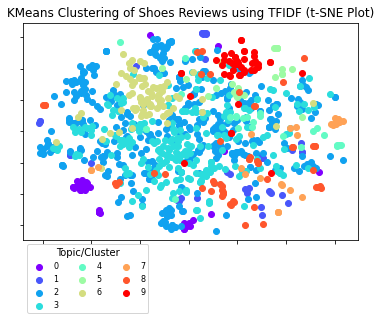

In [59]:
# Membuat scatterplot clustering Shoes review dengan Kmeans Clustering:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

def plot_scatter_2d(x, y, c, sample_size, title):
    df = pd.DataFrame({'x': x, 'y': y, 'c': c}).sample(sample_size)
    l = len(np.unique(c))
    
    ax = plt.subplot(111)
    colors = cm.rainbow(np.linspace(0, 1, l))
                                   
    for c in range(0,l):
        qq = df[df['c']==c]
        ax.scatter(qq['x'], qq['y'],c=colors[c], label=c)
    plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0), title='Topic/Cluster')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title(title)
    plt.show()

%matplotlib inline
plot_scatter_2d(tsne_m[0], tsne_m[1], kmean_d, 1000, 'KMeans Clustering of Shoes Reviews using TFIDF (t-SNE Plot)')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

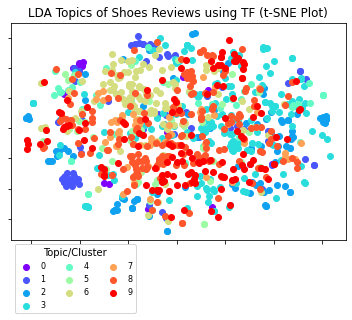

In [60]:
%matplotlib inline
plot_scatter_2d(tsne_m[0], tsne_m[1], lda_c, 1000, 'LDA Topics of Shoes Reviews using TF (t-SNE Plot)')

In [61]:
# Split dataset into training set and test set:

X_train, X_test, y_train, y_test = train_test_split(tfidf_d, 
                                                    data_shoes1['rating_cat'], 
                                                    test_size=0.3)

In [62]:
# Menghitung akurasi model:

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

def calculate_cv(X, y):
    results = {
        'lr': [],
        'svm': [],
        'nb': [],
        'combined': []
    }
    lm = LogisticRegression()
    svm = LinearSVC()
    nb = MultinomialNB()
    vc = VotingClassifier([('lm', lm), ('svm', svm), ('nb', nb)])
    
    for c in rating:
        y_adj = np.array(y==c)
        results['lr'].append((cross_val_score(lm, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['svm'].append((cross_val_score(svm, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['nb'].append((cross_val_score(nb, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['combined'].append((cross_val_score(vc, X, y_adj, cv=10, scoring='accuracy').mean(), c))
    return results

cv_scores = calculate_cv(X_test, y_test)

print("Model accuracy predictions\n")
for m,s in cv_scores.items():
    for ss in s:
        print("{M} model ({R} rating): {S:.1%}".format(M=m.upper(), R=ss[1], S=ss[0]))
    print()

Model accuracy predictions

LR model (low rating): 91.4%
LR model (neutral rating): 91.1%
LR model (high rating): 87.5%

SVM model (low rating): 91.4%
SVM model (neutral rating): 90.3%
SVM model (high rating): 87.2%

NB model (low rating): 89.9%
NB model (neutral rating): 91.1%
NB model (high rating): 84.3%

COMBINED model (low rating): 91.4%
COMBINED model (neutral rating): 91.1%
COMBINED model (high rating): 87.5%



In [63]:
# Logistic regression: 

def get_lr(x, y):
    models = []
    for c in rating:
        y_adj = np.array(y==c)
        lm = LogisticRegression()
        lm_f = lm.fit(x, y_adj)
        models.append(lm_f)
    return models

lr_m = get_lr(X_train, y_train)

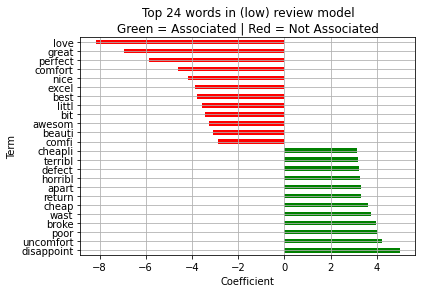

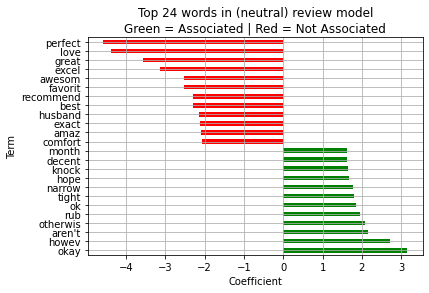

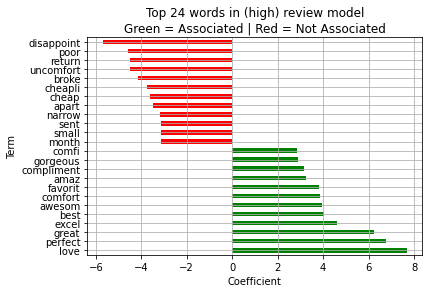

In [64]:
%matplotlib inline

def plot_coef(title, model, feature_names, n_words):
    v = []
    for topic_idx, topic in enumerate(model.coef_):
        [v.append([feature_names[i], model.coef_.item(i)]) for i in topic.argsort()[:-n_words - 1:-1]]
        [v.append([feature_names[i], model.coef_.item(i)]) for i in topic.argsort()[0:n_words]]
    df = pd.DataFrame(v, columns=['Term','Coefficient']).sort_values(by='Coefficient',ascending=False)
    df['c'] = df['Coefficient']>0
    ax = df.plot(x='Term', y='Coefficient', kind='barh', color=df['c'].map({True: 'g', False: 'r'}), grid=True, legend=False,
           title=title)
    ax.set_xlabel("Coefficient")

n_terms = 12
for c in range(0,len(rating)):
    plot_coef('Top {N} words in ({R}) review model\nGreen = Associated | Red = Not Associated'.format(N=n_terms*2, R=rating[c]), 
              lr_m[c], tfidf_m.get_feature_names(), n_terms)

In [65]:
# Pengetesan model:
def test_review(text):
    test_str = [text]
    test_new = tfidf_m.transform(test_str)

    print('Review text: "{R}"\n'.format(R=test_str[0]))
    print('Model Prediction')
    for m in range(0,3):
        print('Model ({M}): {P:.1%}'.format(M=rating[m], P=lr_m[m].predict_proba(test_new)[0][1]))

In [66]:
test_review('I bought a adidas shoes but wrong size. I returned it when it arrived.')

Review text: "I bought a adidas shoes but wrong size. I returned it when it arrived."

Model Prediction
Model (low): 58.6%
Model (neutral): 17.7%
Model (high): 21.2%


In [67]:
test_review('I really like a nike shoes, so comfort, and the price was cheap I am glad to bought it')

Review text: "I really like a nike shoes, so comfort, and the price was cheap I am glad to bought it"

Model Prediction
Model (low): 9.5%
Model (neutral): 4.6%
Model (high): 79.6%


In [68]:
test_review('the shoes is so uncomfortable to wear')


Review text: "the shoes is so uncomfortable to wear"

Model Prediction
Model (low): 86.7%
Model (neutral): 11.9%
Model (high): 5.2%
